In [52]:
import psycopg2
import hidden
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the secrets
secrets = hidden.secrets()

conn = psycopg2.connect(host=secrets['host'],
        port=secrets['port'],
        database=secrets['database'], 
        user=secrets['user'], 
        password=secrets['pass'], 
        connect_timeout=3)

In [53]:
sql = """select cat_name, tran_date, detail, total_amount from transactions inner join category on transactions.cat_id = category.id order by transactions.id;"""

transactions_df = pd.read_sql_query(sql, conn).rename(columns={'cat_name': 'Category', 'tran_date': 'Date', 'detail': 'Detail', 'total_amount': 'Amount'})

C:\Users\herna\AppData\Local\Temp\ipykernel_1580\3121287472.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  transactions_df = pd.read_sql_query(sql, conn).rename(columns={'cat_name': 'Category', 'tran_date': 'Date', 'detail': 'Detail', 'total_amount': 'Amount'})


In [54]:
with conn.cursor() as cur:
        sql = """select sum(total_amount) from transactions;"""
        cur.execute(sql)
        total = cur.fetchone()[0]
        print(f'Total amount: {total:,.2f}')
        
conn.close()

Total amount: 402.90


In [55]:
# Bar chart for each category in april
import matplotlib.pyplot as plt
import seaborn as sns

month = 4

transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], errors='coerce')

# Filtrar por mes 4 (abril)
month_df = transactions_df[transactions_df['Date'].dt.month == month]
month_df

,Category,Date,Detail,Amount
0,income,2025-04-01,Monthly deposit,905.32
1,income,2025-04-01,Coupon,100.00
2,relax,2025-04-01,Shawarma,-26.00
3,protein,2025-04-01,Whole chicken,-24.30
4,fruit,2025-04-01,Strawberries and grapes,-18.00
5,veggies,2025-04-01,"Tomatoes, green beans, garlic, carrot",-16.40
6,groceries,2025-04-01,"Bread, pasta, legumes, milk, oil",-98.20
7,protein,2025-04-01,"Chorizo, liver, ham",-40.48
8,household expenses,2025-04-01,Electricity,-100.00
9,household expenses,2025-04-01,Internet,-59.00


In [56]:
month_df['Amount'].sum()

0.6900000000000439

In [57]:
# Group by category and calculate the sum of Amount
cat_summary = month_df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

cat_summary

,Category,Amount
0,income,1055.32
1,fruit,-40.00
2,veggies,-48.40
3,relax,-133.30
4,protein,-247.12
5,groceries,-256.78
6,household expenses,-329.03


In [58]:
cat_summary_absolute = cat_summary.copy()
cat_summary_absolute['Amount'] = cat_summary_absolute['Amount'].abs()
cat_summary_absolute.sort_values(by='Amount', ascending=False, inplace=True)

C:\Users\herna\AppData\Local\Temp\ipykernel_1580\4069606600.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Amount', y='Category', data=cat_summary_absolute, palette=palette)
C:\Users\herna\AppData\Local\Temp\ipykernel_1580\4069606600.py:5: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x='Amount', y='Category', data=cat_summary_absolute, palette=palette)


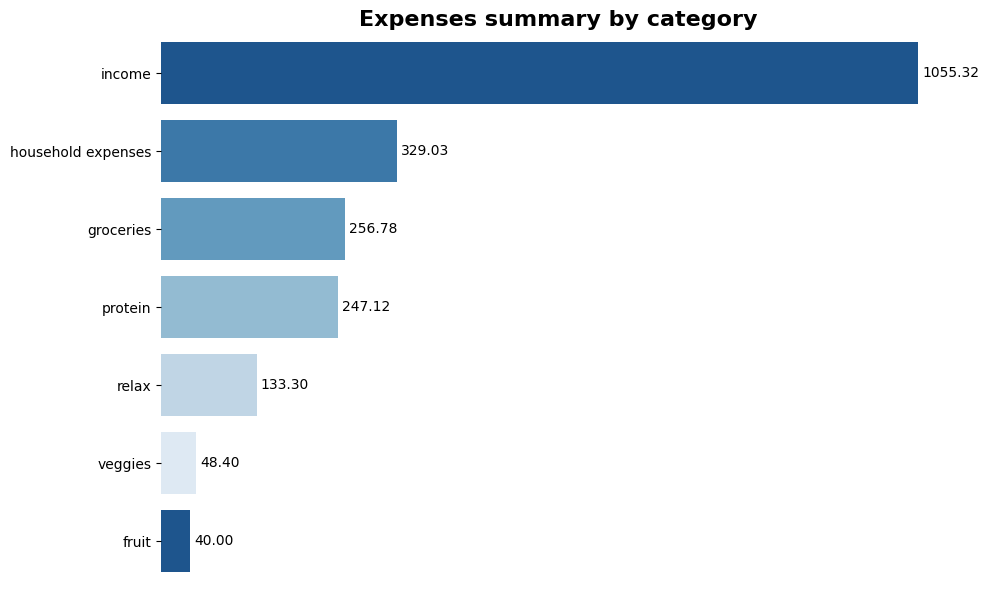

In [59]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette("Blues")[::-1]  # invertir la paleta

ax = sns.barplot(x='Amount', y='Category', data=cat_summary_absolute, palette=palette)

# Rotar etiquetas
plt.xticks(rotation=90)

# Títulos
plt.title('Expenses summary by category', fontsize=16, fontweight='bold')
plt.xlabel('Total amount', fontsize=14, fontweight='bold')
plt.ylabel('')

# Quitar eje Y
ax.xaxis.set_visible(False)

# Quitar bordes
for spine in ax.spines.values():
    spine.set_visible(False)

# Etiquetas de los valores
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()